In [3]:
import os
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

In [7]:

data_dir = '../results/Modis/sst/'
varname = 'sst'
cmin, cmax = 10, 30  # Set the min and max values for the color scale
# Initialize a dictionary to hold the data for each month.
yearly_data = {month: [] for month in range(2003, 2023)}
print(yearly_data)
# Assuming these are the coordinates you want to crop to
# lat_min_crop, lat_max_crop = 34.3, 35.7  # Update these values as needed
# lon_min_crop, lon_max_crop = 138.3, 140.23  # Update these values as needed

# lat_min_crop, lat_max_crop = 34.5, 35.4
# lon_min_crop, lon_max_crop = 138.82, 139.9
lat_min_crop, lat_max_crop = 34.4, 35.7
lon_min_crop, lon_max_crop = 138.35, 140.2
# rectangle_coords = [(35.7,  138.35), (35.7, 140.2), (34.4, 140.2), (34.4,  138.35), (35.7,  138.35)]


{2003: [], 2004: [], 2005: [], 2006: [], 2007: [], 2008: [], 2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: []}


In [8]:

# Loop through files and accumulate data
for file_name in os.listdir(data_dir):
    if file_name.endswith('.nc'):
        year, month = int(file_name[1:5]), int(file_name[5:7])
        if year < 2003 or year > 2022:
            continue
        file_path = os.path.join(data_dir, file_name)
        with Dataset(file_path, 'r') as nc:
            data = np.ma.squeeze(nc[varname][:])
            lat = nc['lat'][:]
            lon = nc['lon'][:]
            
            # Find indices for cropping
            lat_inds = np.where((lat >= lat_min_crop) & (lat <= lat_max_crop))[0]
            lon_inds = np.where((lon >= lon_min_crop) & (lon <= lon_max_crop))[0]
            # Crop data
               # Now add a check to ensure the indices are within the bounds of the array
            if lat_inds.size > 0 and lon_inds.size > 0:
               # Adjust the slicing based on the actual dimensions of sds
               data_cropped = data[lat_inds, :][:, lon_inds]  # This is the updated line for a 2D array
               lat_cropped = lat[lat_inds]
               lon_cropped = lon[lon_inds]
            else:
               print("No data within specified crop bounds.")
            
            # print(np.ma.mean(data_cropped))    
            # sds_cropped = sds[:, lat_inds, :][:, :, lon_inds]  # Assuming sds has a shape of [time, lat, lon]
            lat_cropped = lat[lat_inds]
            lon_cropped = lon[lon_inds]
            # Convert masked values to NaN
            data_cropped = np.where(data_cropped.mask, np.nan, data_cropped)

            yearly_data[year].append(data_cropped)
print(yearly_data)            

{2003: [array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [17.005   , 16.89    , 16.955   , ..., 19.605   , 19.51    ,
        19.59    ],
       [17.09    , 16.98    , 17.039999, ..., 19.77    , 19.744999,
        19.645   ],
       [17.095   , 16.984999, 17.065   , ..., 19.835   , 19.85    ,
        19.46    ]], dtype=float32), array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [15.83    , 15.79    , 15.799999, ..., 19.32    , 19.97    ,
        19.734999],
       [15.815   , 15.549999, 15.67    , ..., 19.385   , 19.355   ,
   

In [25]:

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plot, colors

hex_colors_sst = [
   '#ffffff','#b7f0ae','#21f600','#0000FF','#FDFF92','#FF2700','#d600ff', "red"
]


hex_colors_sst = [
    '#FF2700',  # Red
    '#FFA500',  # Orange
    '#FDFF92',  # Yellow
    '#b7f0ae',  # Light Green
    '#21f600',  # Bright Green
    '#0000FF',  # Blue
    '#4b0082',  # Indigo
    '#d600ff',  # Purple (Violet)
    '#a500ff',  # Deep Purple (darker Violet)
    '#ffffff'  # White (for peak temperatures)
]

# # Convert hex color list to RGB
# rgb_colors = [colors.hex2color(color) for color in hex_colors_sst]
# rgb_colors = ["blue","#6495ED", "#008080","green","#28B463", "yellow","#FFC300","#FFBF00","orange","#DE3163","red","#CD5C5C"]
rgb_colors = ["blue","green","lightgreen", "yellow", "orange", "#FF474C", "red"]
# monthly_averages = {month: np.nanmean(np.stack(data_list), axis=0) for month, data_list in monthly_data.items() if data_list}
monthly_averages = {year: np.nanmean(np.stack(data_list), axis=0) for year, data_list in yearly_data.items() if data_list}


C:\Users\Robel\AppData\Local\Temp\ipykernel_16532\3920066767.py:63: RuntimeWarning: Mean of empty slice
  monthly_averages = {year: np.nanmean(np.stack(data_list), axis=0) for year, data_list in yearly_data.items() if data_list}


20


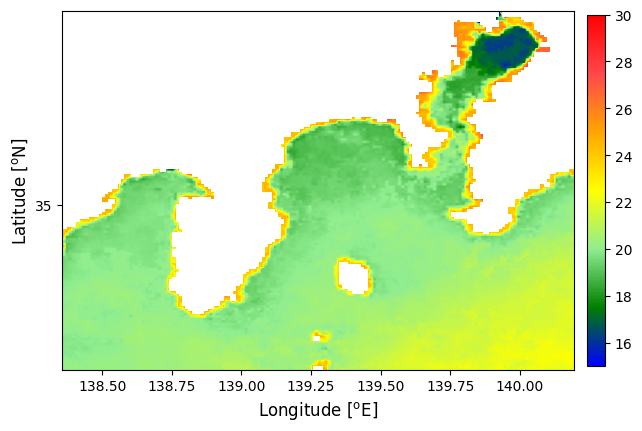

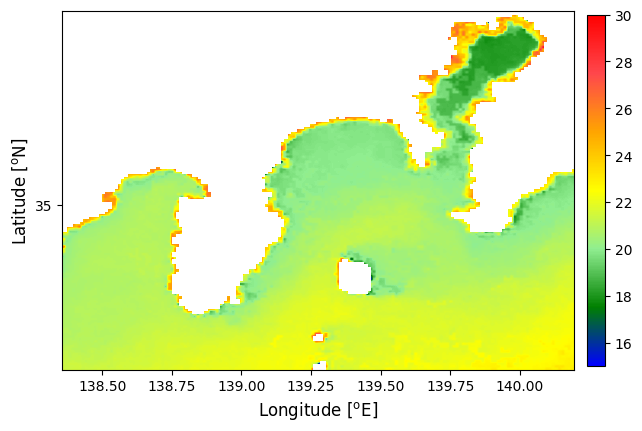

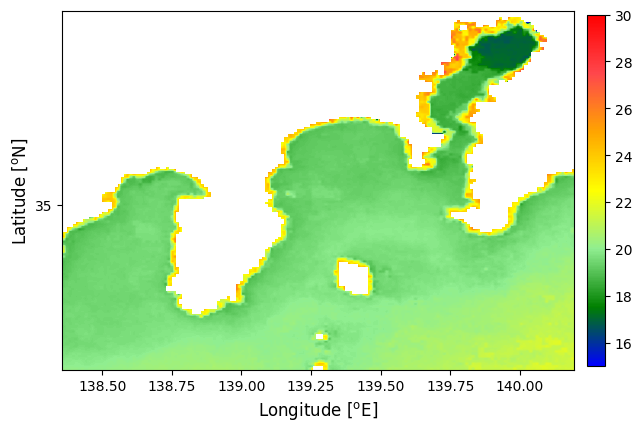

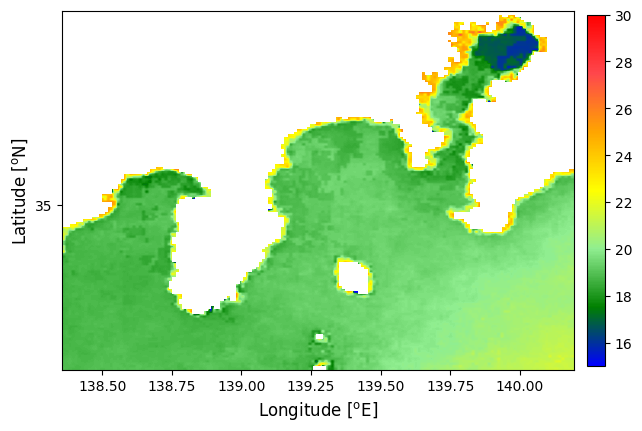

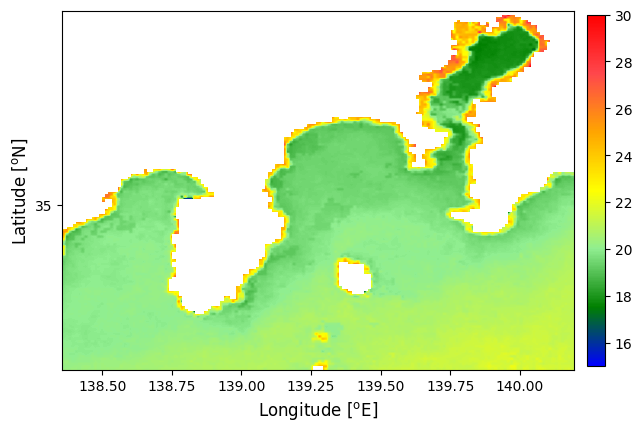

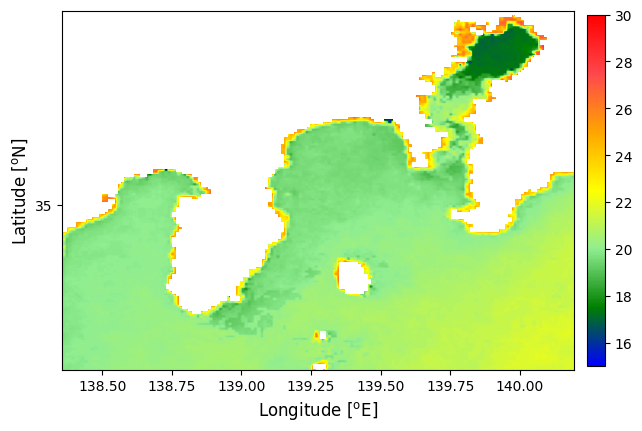

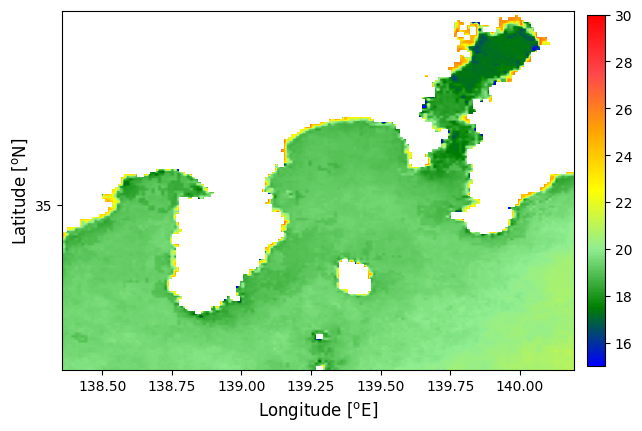

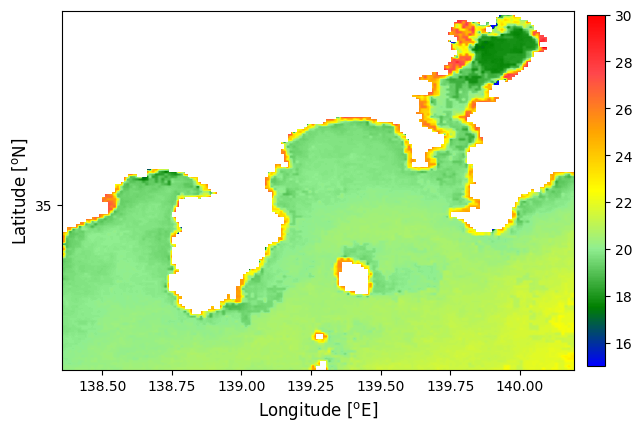

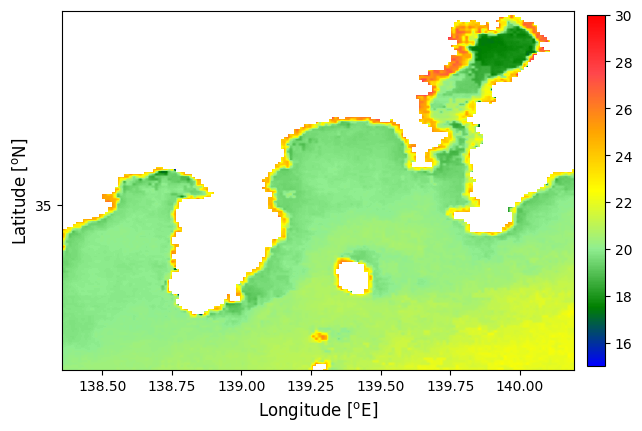

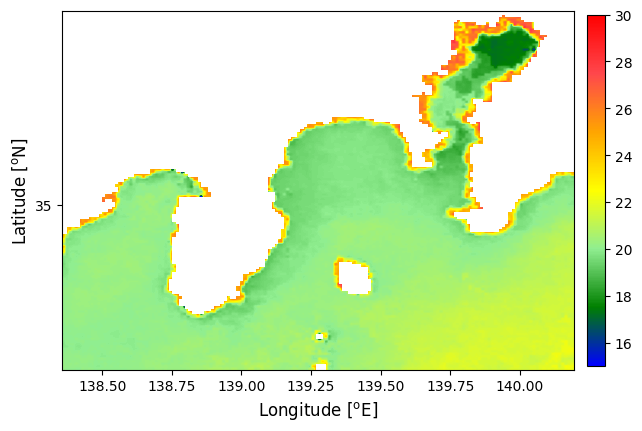

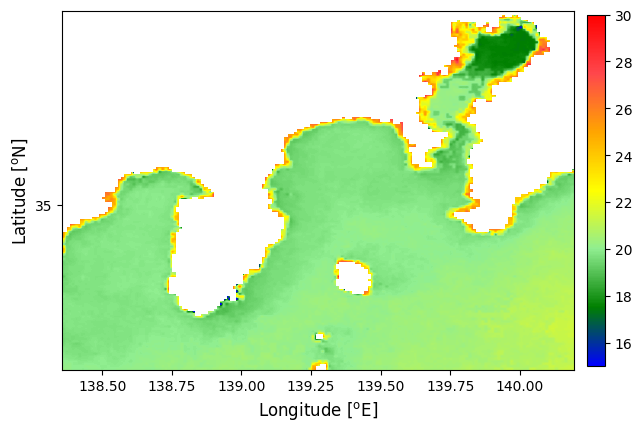

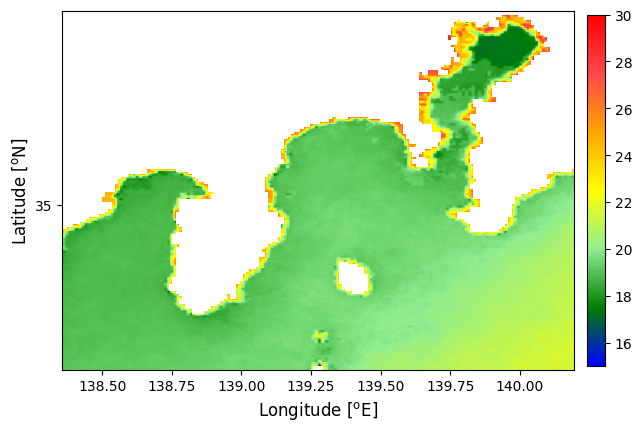

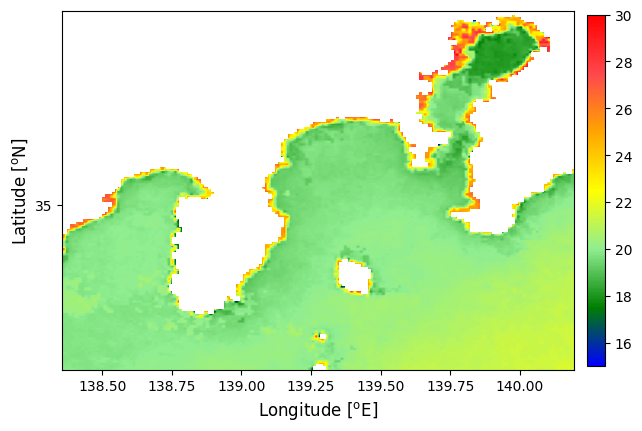

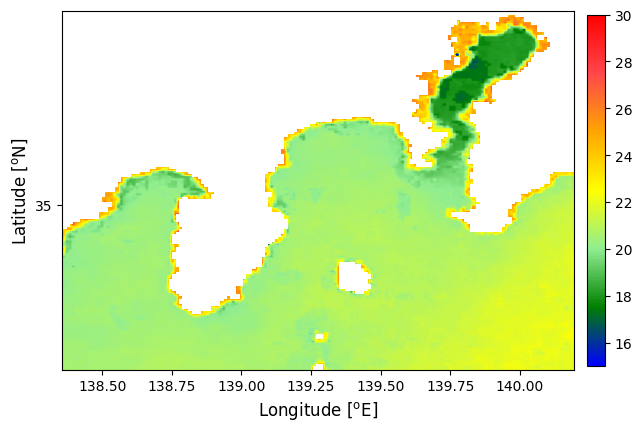

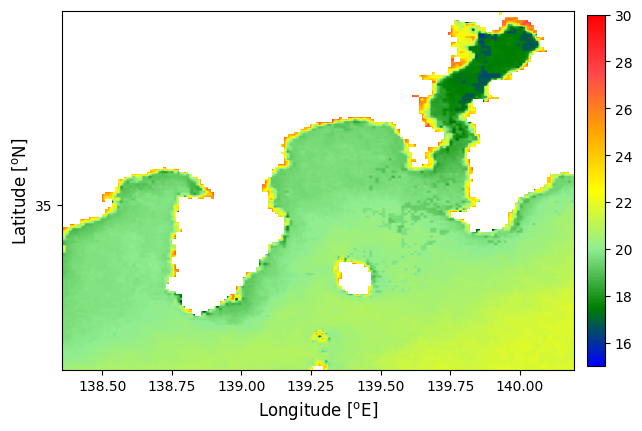

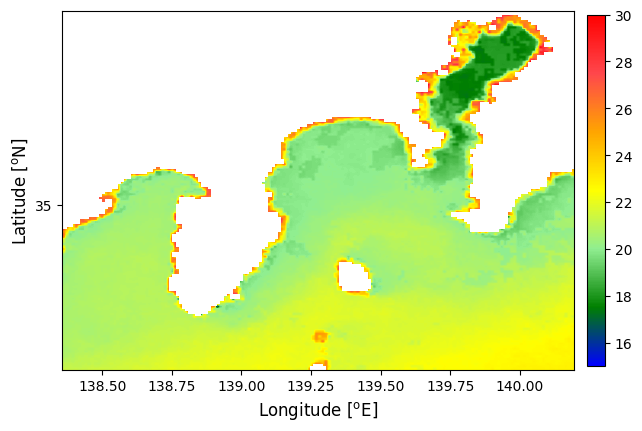

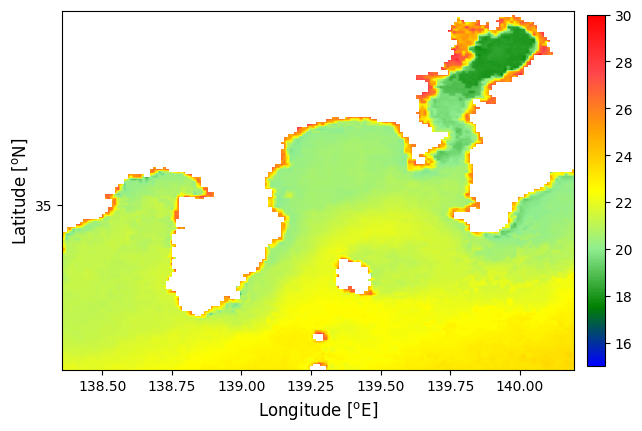

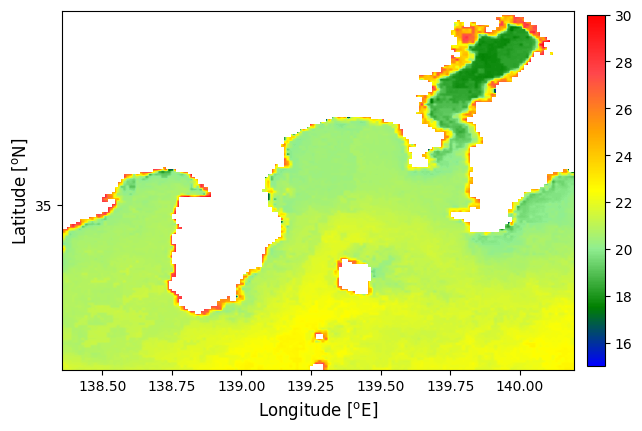

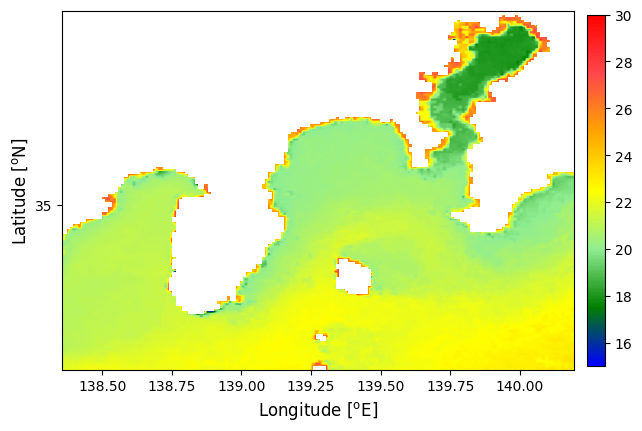

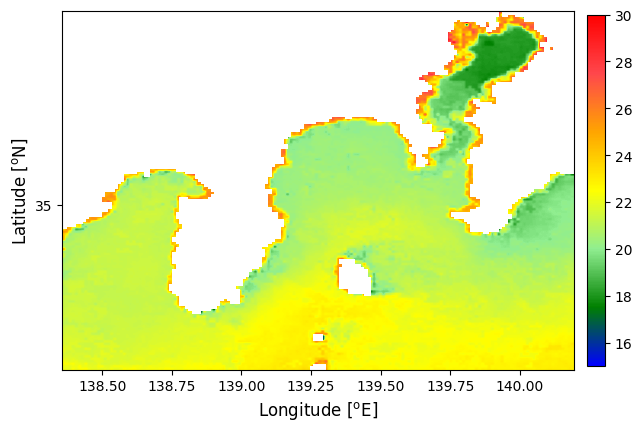

In [27]:
# cmin, cmax = -2,2
cmin, cmax = 15, 30
print(len(monthly_averages))
for month, sds_cropped in monthly_averages.items():    # Visualisation with basemap
    # print("runnign")
    if len(lon_cropped.shape) == 1:
        lon_cropped, lat_cropped = np.meshgrid(lon_cropped, lat_cropped)
    lon_0, lat_0 = (lon_cropped.min() + lon_cropped.max()), (lat_cropped.min() + lat_cropped.max()) / 2
    m = Basemap(llcrnrlon=lon_cropped.min(), llcrnrlat=lat_cropped.min(), 
                        urcrnrlon=lon_cropped.max(), urcrnrlat=lat_cropped.max(), resolution='i', 
                        lon_0=lon_0, lat_0=lat_0, projection='merc')

    # Visualisation without basemap
    # Adjust figsize to change the aspect ratio
    fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio

    # figure bounds
    extent = [lon_cropped.min(), lon_cropped.max(), lat_cropped.min(), lat_cropped.max()]

    # Land mask
    # mask = np.where(~sds_cropped.mask, np.nan, 0)
    ax.imshow(sds_cropped, cmap='gray', vmin=-2, vmax=0, extent=extent)

    # Create a colormap object
    custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)

    # print(sds_cropped_log.max(), sds_cropped_log.min())

    # We no longer use LogNorm here since we've manually applied log10
    # ims = ax.imshow(sds_cropped_log, cmap='jet', extent=extent)
    # ims = ax.imshow(sds_cropped,vmin=cmin, vmax=cmax,   extent=extent)

    ims = ax.imshow(sds_cropped,vmin=cmin, vmax=cmax,  cmap=custom_colormap, extent=extent)

    # # Figure labels
    ax.set_xlabel('Longitude [$^\mathregular{o}$E]', fontsize="12")
    ax.set_ylabel('Latitude [$^\mathregular{o}$N]', fontsize="12")
    ax.set_yticks(range(int(np.ceil(lat_cropped.min())), int(np.ceil(lat_cropped.max())), 1))
    # ax.set_title(time[0].strftime('%b %Y'))

    # # Colourbar
    cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=20)
    # cbar.set_label('log10(Chl-a) Conc. mg/m^3', fontsize="12")

    # ticks = [ims.get_clim()[0],0, ims.get_clim()[1]] # This gets the color limit range
    # cbar.set_ticks(ticks)
    # cbar.set_ticklabels([f'{ticks[0]:.2f}', f'{ticks[1]:.2f}', f'{ticks[2]:.2f}']) # Format as desired

    # Small Sagami Bay
    lat_min, lat_max = 35.124, 35.34
    lon_min, lon_max = 139.115, 139.68
    plt.savefig(f'yearly/sst/average_sst_{month:02d}.png', dpi=300)


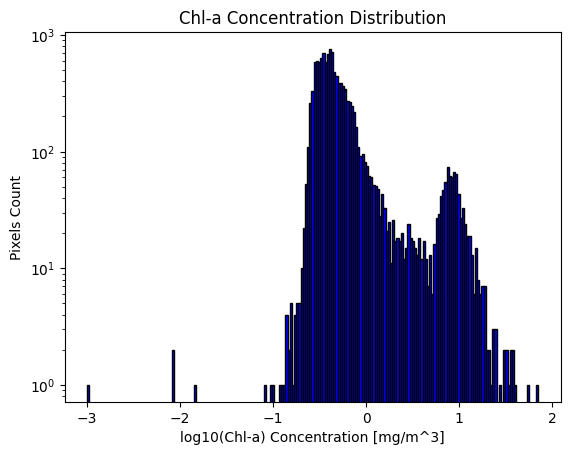

In [19]:
# show data distribution in histogram for last month

fig, ax = plt.subplots()
n_bins = 'auto'
pixel_values = sds_cropped_log.flatten()
pixel_values = pixel_values[~pixel_values.mask]  # Remove masked values (NaN or inf values)

# ax.hist(sds_cropped_log.compressed(), bins=100, color='blue', alpha=0.7)
ax.hist(pixel_values, bins=n_bins, color='blue', edgecolor='black')

ax.set_yscale('log')
ax.set_xlabel('log10(Chl-a) Concentration [mg/m^3]')
ax.set_ylabel('Pixels Count')
ax.set_title('Chl-a Concentration Distribution')
plt.savefig(f'yearly/average_chla_hist.png', dpi=300)
plt.show()